This case study is based on the very famous dataset in machine learning. The titanic survival data. The data contains information about 891 passengers. It also indicates whether the passenger survived the titanic crash or not?

<u>The goal is to create a predictive model which can predict the survival of a given person</u>, if they were to board the titanic and the ship sinks.

**The flow of the case study is as below:**

- Reading the data

- Defining the problem statement

- Identifying the target variable

- Looking at the distribution of target variable

- Basic data exploration

- Rejecting useless columns

- Missing values treatment

- Visual exploratory data analysis

- Feature selection based on data distribution

- Outlier treatment

- Visual correlation analysis

- Statistical correlation analysis \(Feature Selection\)

- Converting data to numeric for ML

- Data Pre-processing

- Trying multiple classification algorithms

- Selecting the best model

- Deploying the best model in production



## Reading the Data

The data has one file "TitanicSurvivalData.csv". This file contains 891 passenger details.

### Data Description

The business meaning of each column in the data is as below:

- **PassengerId**: The id for each passenger
- **Survived**: Whether the passenger survived or not? 1=Survived, 0=Died
- **Pclass**: The travel class of the passenger
- **Name**: Name of the passenger
- **Sex**: The genger of the passenger
- **Age**: The Age of the passenger
- **SibSp**: Number of Siblings/Spouses Aboard
- **Parch**: Number of Parents/Children Aboard
- **Ticket**: The ticket number of the passenger
- **Fare**: The amount of fare paid by the passenger
- **Cabin**: The cabin number allotted
- **Embarked**: Port of Embarkation \(C = Cherbourg; Q = Queenstown; S = Southampton\)



In [1]:
# importing libraries and reading the data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

titanic_data = pd.read_csv('TitanicSurvivalData.csv')
print(titanic_data.shape)
titanic_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# removing duplicates
titanic_data.drop_duplicates(inplace=True)
titanic_data.shape

(891, 12)

## Defining the Problem Statement ##

<u>Create a predictive model which can tell if a person will survive the titanic crash or not.</u>

**Target variable**: Survived \(0 \- passenger died, 1 \- passenger survived\)

**Predictors**: Pclass, Sex, Age, Sibsp, etc.

**Determining the type of ML model to use**: supervised classification 


## Distribution of the Target Variable ##

- since the target variable is categorical data, we can look into the distribution using bar chart
- distribution should show a balance of each class, so that the machine learning algorith could learn all classes later on


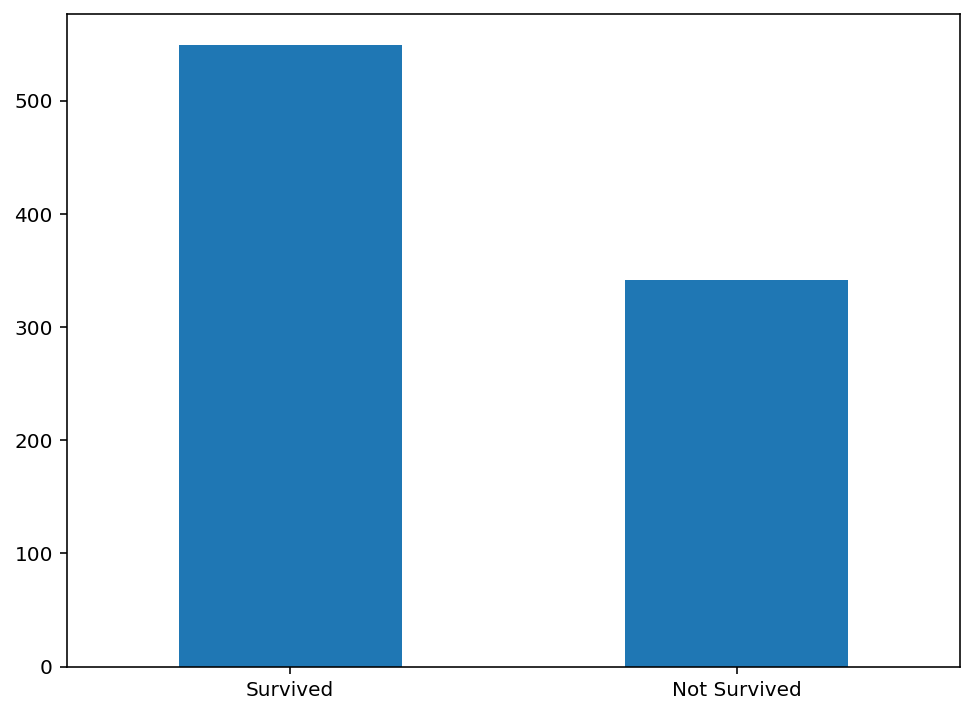

In [3]:
import matplotlib.pyplot as plt
titanic_data.groupby('Survived').size().plot(kind='bar', figsize=(8,6))
plt.xticks(rotation=0)
plt.xlabel(None)
plt.xticks([0, 1],labels=['Survived', 'Not Survived'])
plt.show()

**The distribution is moderately right\-skewed. Both classes have sufficient number of rows to investigate.**


## Basic Data Exploration ##

In [4]:
# summarized information of the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
# missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# identifying continuous and categorical data
titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# descriptive statistics
titanic_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Basic Data Exploration Results ###

- types of data for column:

  - **PassengerId**: qualitative
  - **Survived**: categorical \(TARGET VARIABLE\)
  - **Pclass**: categorical
  - **Name**: qualitative
  - **Sex**: categorical
  - **Age**: continuous
  - **SibSp**: categorical
  - **Parch**: categorical
  - **Ticket**: qualitative
  - **Fare**: continuous
  - **Cabin**: qualitative
  - **Embarked**: categorical

- there are 3 columns with missing data: **Age** \(177 out of 891\), **Cabin** \(687 out of 891\) and **Embarked** \(2 out of 891\):

  - **Age**: continuous data \- impute missing values
  - **Embarked**: categorical data \- impute missing values

- columns to be rejected:

  - **PassengerId** \- qualitative data, useless info for machine learning algorithms
  - **Name** \- qualitative data, useless info
  - **Ticket** \- qualitative data, useless info
  - **Cabin** \-qualitative data, too many missing values



In [8]:
# removing non-usefull columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# imputing continuous missing values
titanic_data['Age'].fillna(value=titanic_data['Age'].median(), inplace=True)

# imputing categorical missing values
titanic_data['Embarked'].fillna(value=titanic_data['Embarked'].mode()[0], inplace=True)

In [10]:
# checking missing values again
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Visual Exploratory Data Analysis ##

Looking at the data distribution of the predictor variables using:

- **bar charts** for categorical columns (Pclass, Sex, SibSp, Parch, Embarked)
- **histograms** for continuous columns \(Age, Fare\)



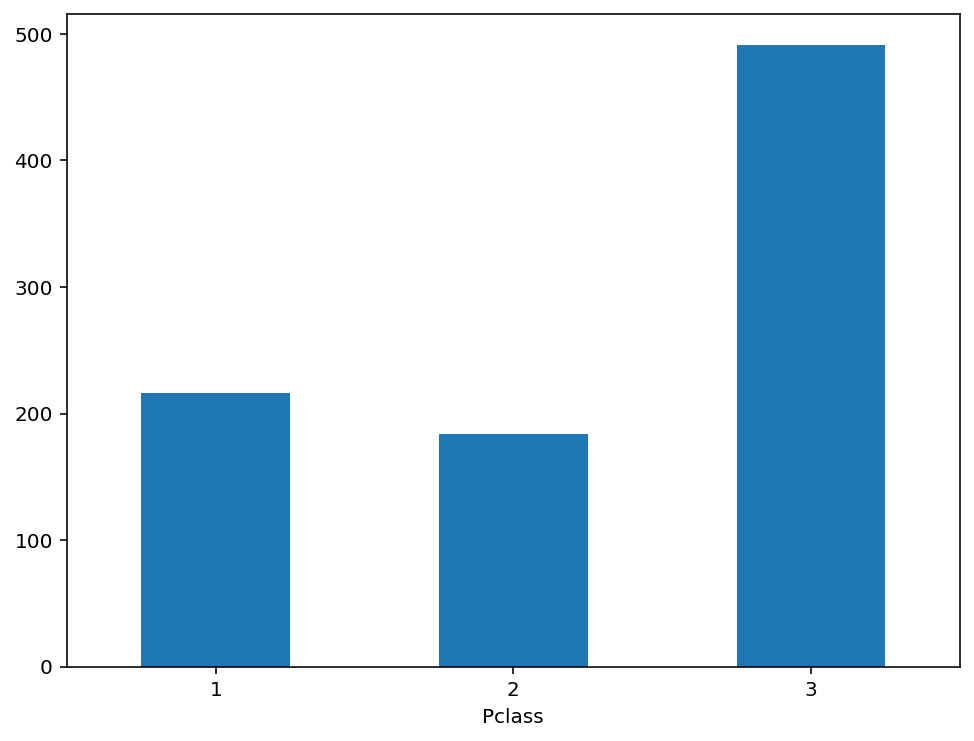

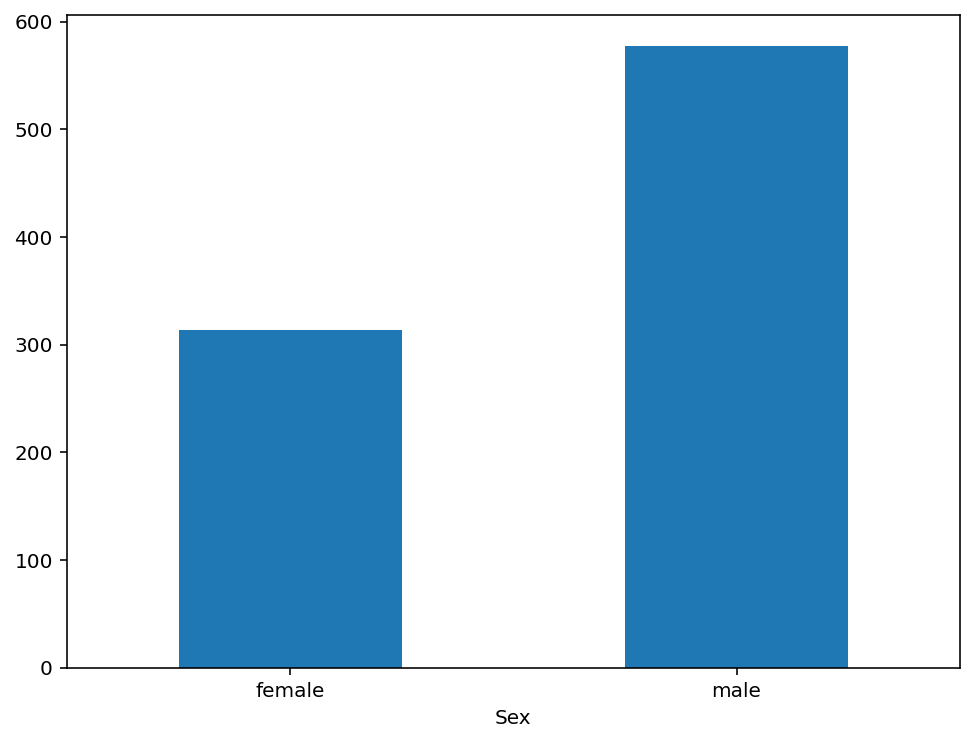

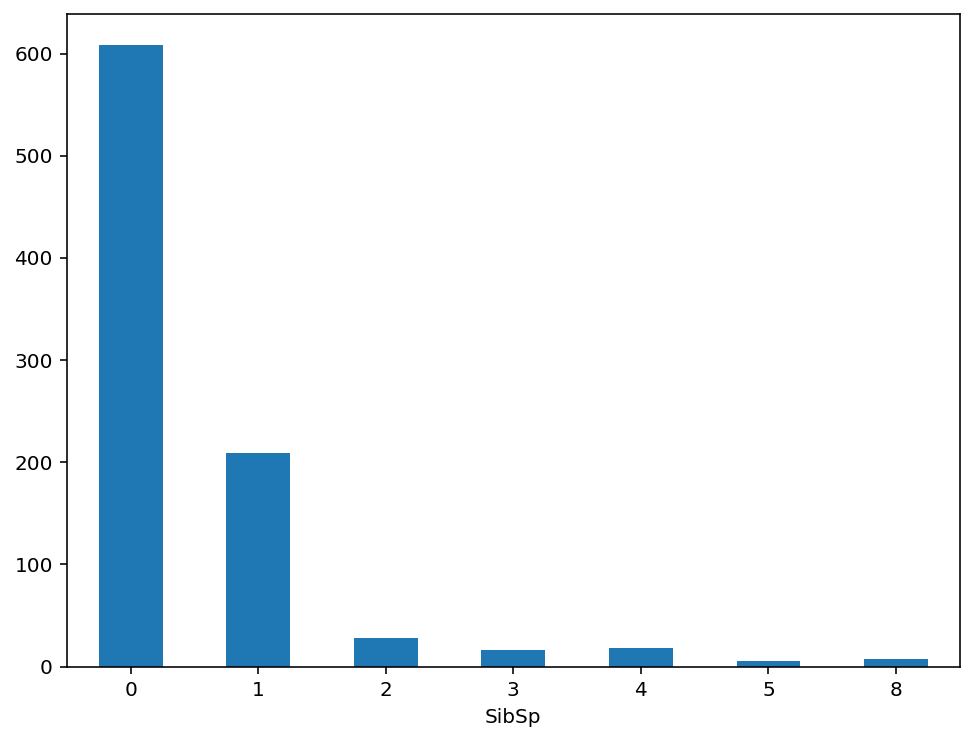

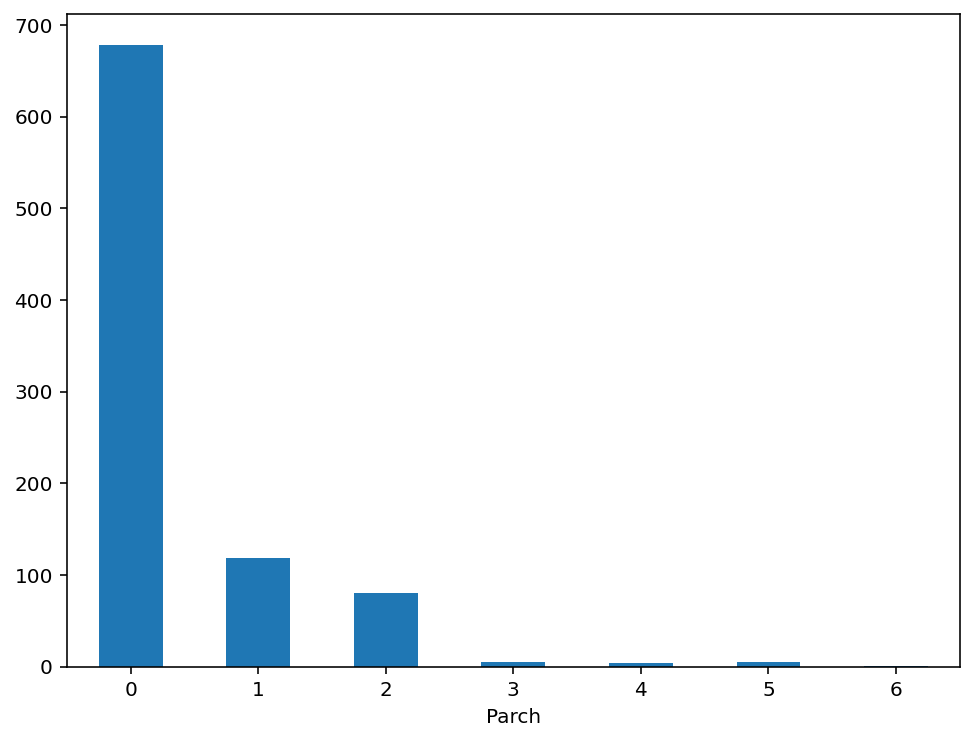

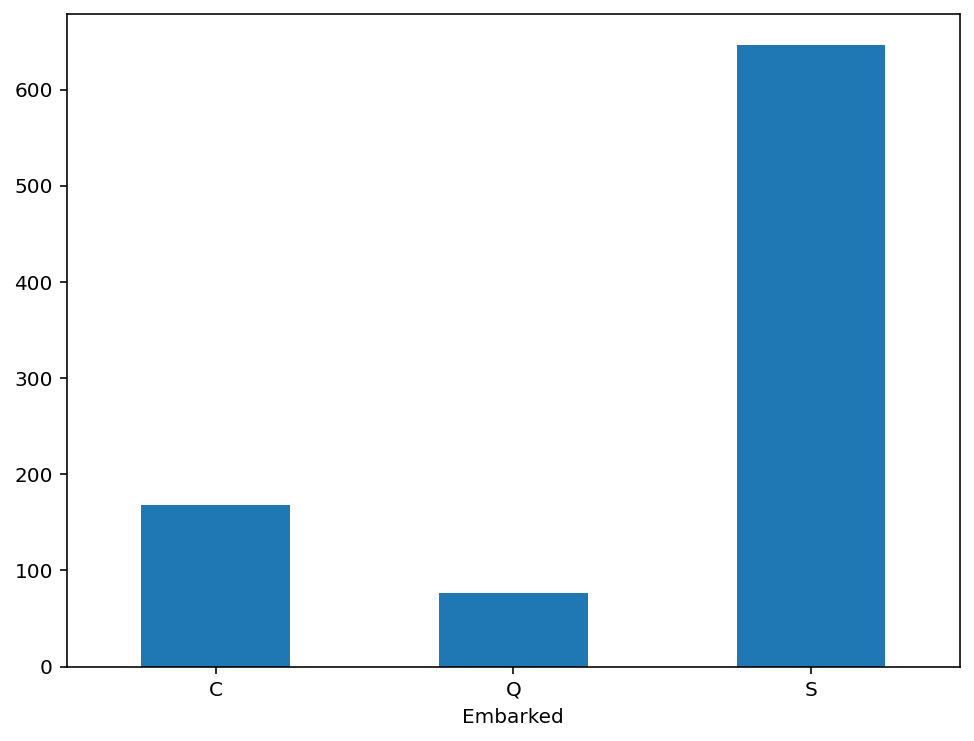

In [11]:
# categorical columns analysis
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    titanic_data.groupby(col).size().plot(kind='bar', figsize=(8,6))
    plt.xticks(rotation=0)
    plt.show()

### Bar Chart Interpretation ###



In ideal bar chart each category has comparable frequency, i.e. there are enough rows for each category in the data for the ML algorithm to learn.

If there's a column which shows too skewed distribution \- there's only one dominant bar and the other categories are present in very low numbers \- these kinds of columns may not be very helpful in machine learning.

In this case, columns 'SibSp' and 'Parch' may be the kind of columns we want to stay clear of. We will confirm this assumption in the correlation analysis section and take a final call to select or reject the column.


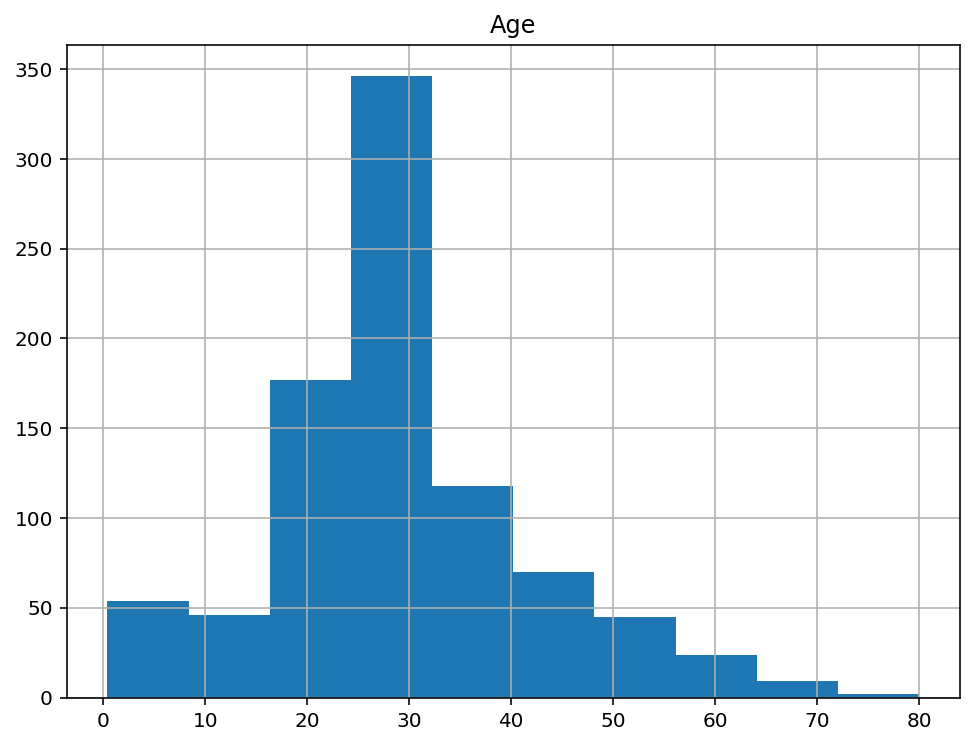

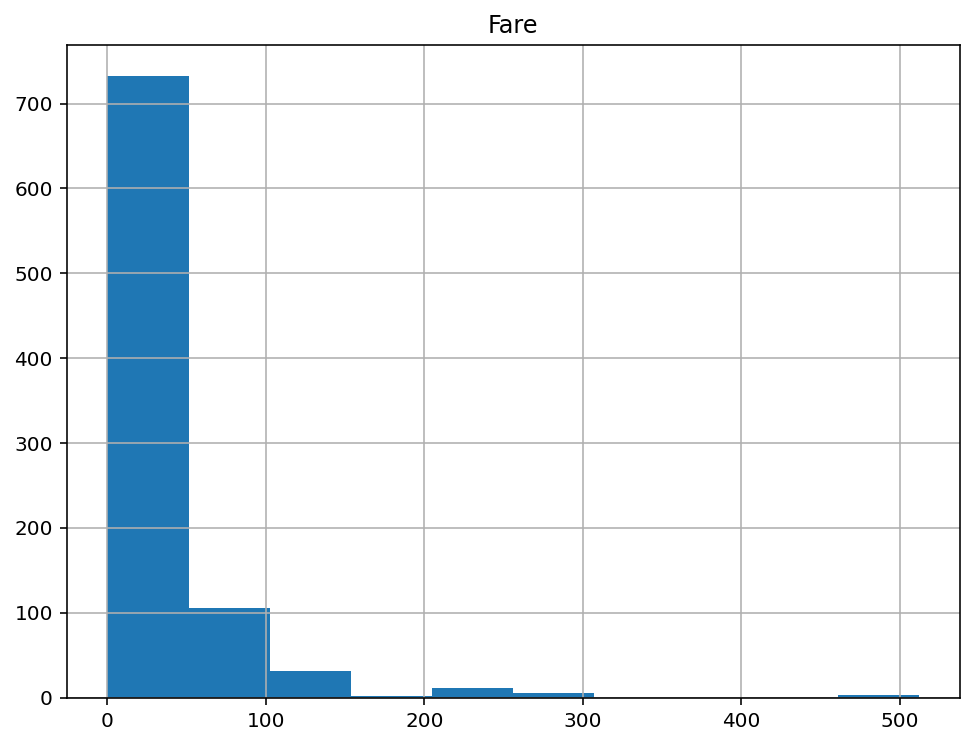

In [12]:
# continuous columns analysis
for col in ['Age', 'Fare']:
    titanic_data[col].hist(figsize=(8,6))
    plt.title(label=col)
    plt.show()

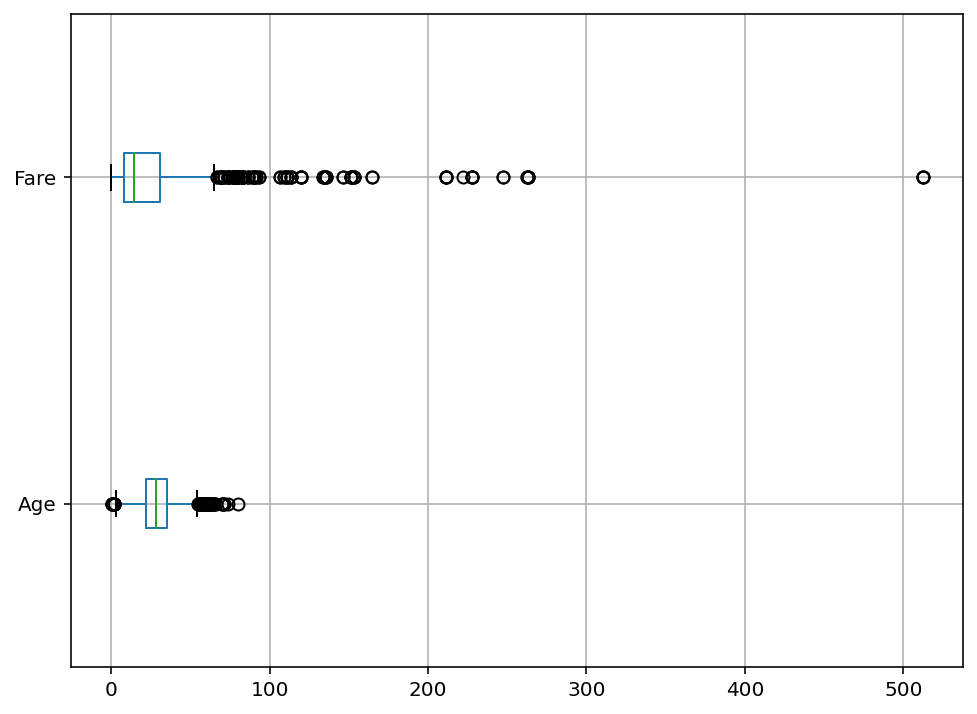

In [13]:
# outliers inspection using boxplot
titanic_data.boxplot(['Age', 'Fare'],figsize=(8,6), vert=False)
plt.show()

### Histogram Interpretation ###

The 'Age' column has acceptable distribution. The 'Fare' column on the other size has outliers (values beyond 300). The outliers need to be delt with so that they do not bias the training of the ML models.

In [14]:
# outliers values
titanic_data['Fare'][titanic_data['Fare'] > 300].sort_values(ascending=False)

258    512.3292
679    512.3292
737    512.3292
Name: Fare, dtype: float64

There are only 3 rows of data that have outliers. We can deal with it by simply deleting these rows or imputing the nearest values.

In [15]:
titanic_data['Fare'][titanic_data['Fare'] < 300].sort_values(ascending=False)

27     263.000
341    263.000
438    263.000
88     263.000
742    262.375
        ...   
633      0.000
413      0.000
822      0.000
732      0.000
674      0.000
Name: Fare, Length: 888, dtype: float64

In [16]:
# imputing the nearest value of 263.0 in place of outliers values
outlier_rows = titanic_data['Fare'] > 300
titanic_data.loc[outlier_rows, 'Fare'] = 263.0

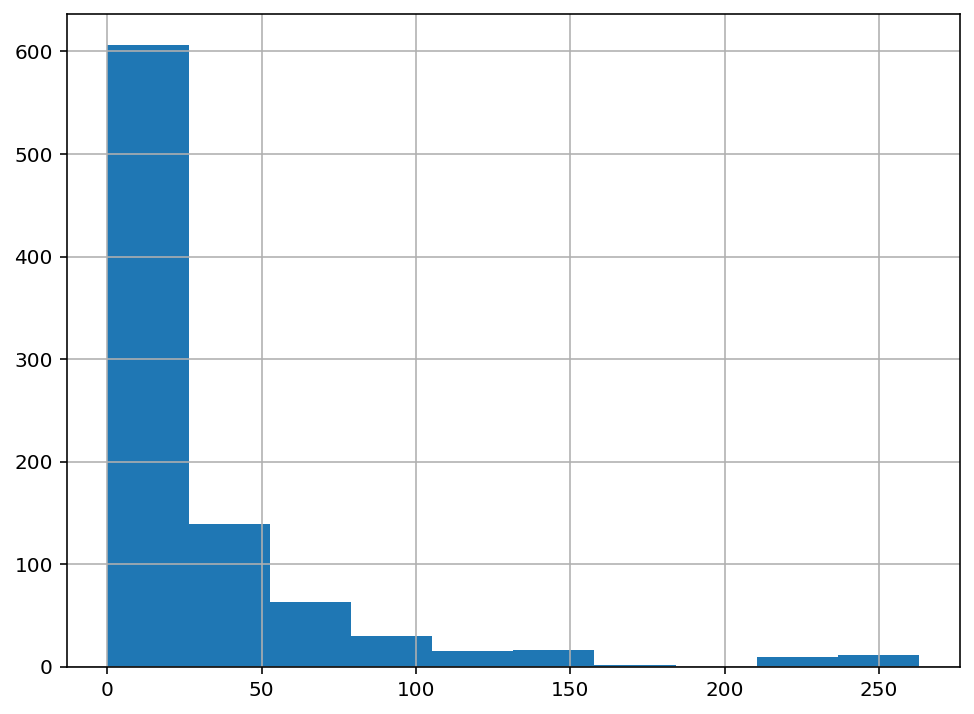

In [17]:
# histogram after imputation
titanic_data['Fare'].hist(figsize=(8,6))
plt.show()

There is still a tale, but it is much thicker than before, which means there are enough data in there to be used for ML models.

### Feature Selection Based on Data Distribution ###

1. **Visual exploration beween each predictor and the target variable:**

   - Box plots \(inspecting continuous predictors in relation to the categorical target variable\)
   - Grouped bar plots \(inspecting categorical predictors in relation to the categorical target variable\)

2. **Statistical measurement:**

   - ANoVa (continuous predictors vs. categorical target)
   - Chi\-Square test \(categorical predictors vs. categorical target\)



#### Box Plots (inspecting continuous predictors) ####

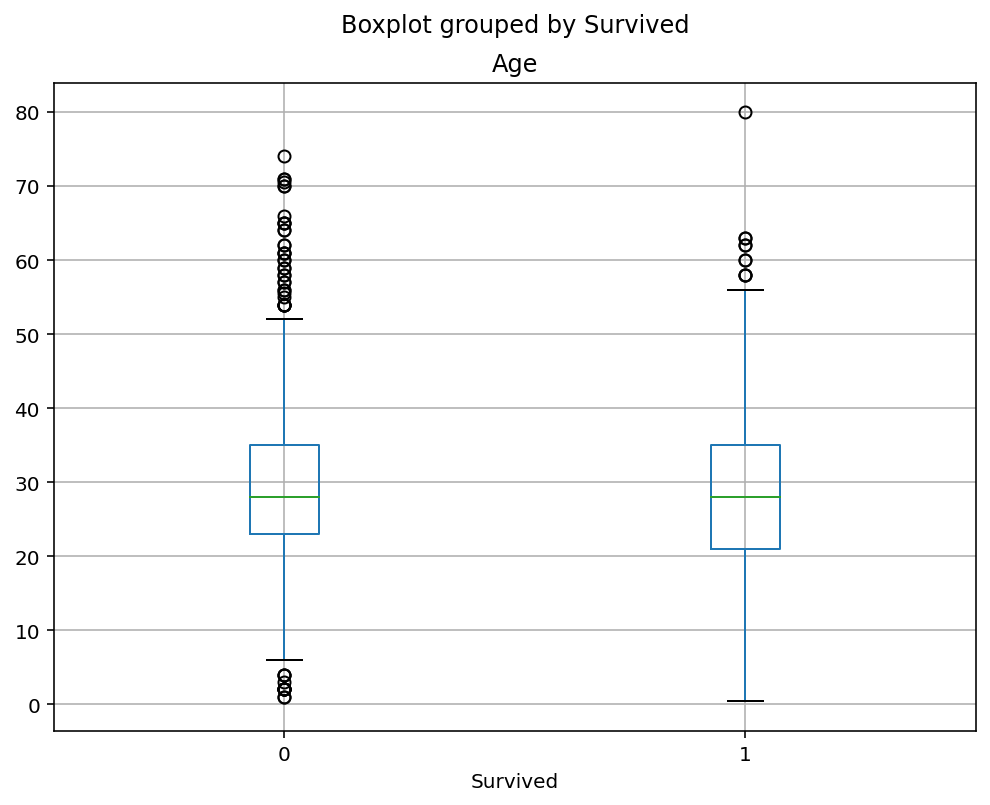

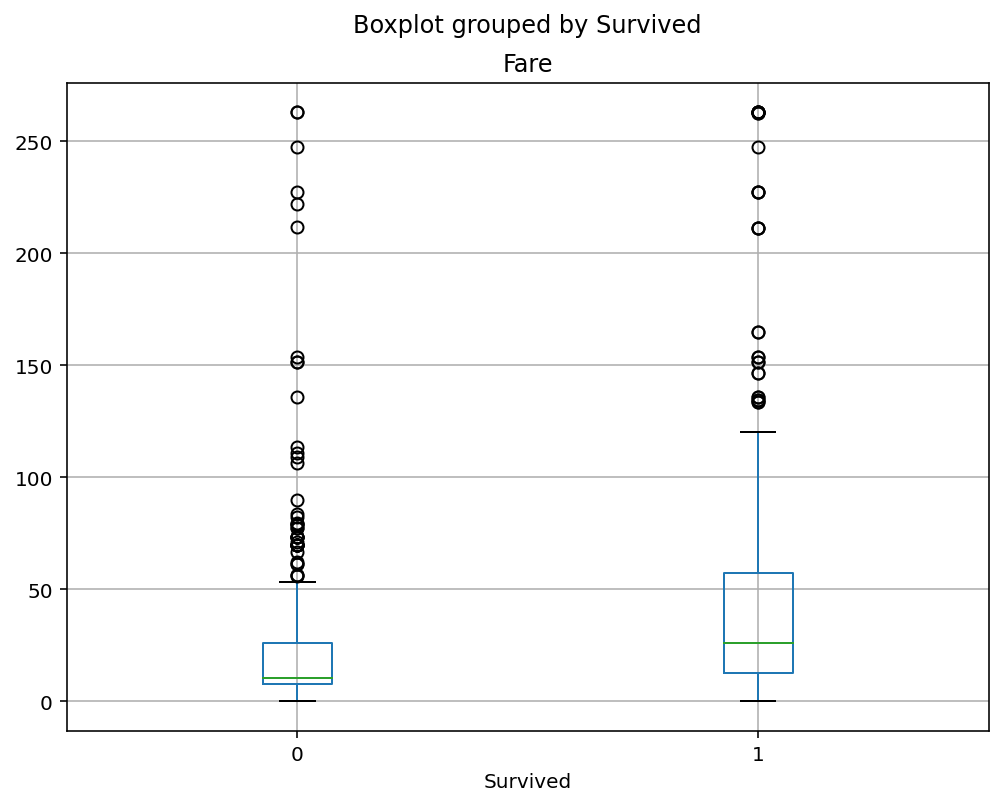

In [18]:
for col in ['Age', 'Fare']:
    titanic_data.boxplot(column=col, by='Survived', figsize=(8,6))
    plt.show()

'Age' vs. 'Survived' boxplot shows that there is no correlation between these two variables. The boxes are set in the same line, hence not telling different information about the impact of the age variable on the target variable.
The other plot, 'Fare' vs. 'Survived', shows quite the opposite - the boxes are not in the same line, so the info we get from the 'Fare' column may be important in influencing the target variable.

The correlation between 'Age' and 'Survived', as well as between 'Fare' and 'Survived' columns will be confirmed using the analysis of variance.

#### ANoVA Analysis (confirming continuous predictors correlation) ####

In [19]:
def anova_analysis(data, target, predictors):
    from scipy.stats import f_oneway
    
    selected_predictors = []
    for predictor in predictors:
        grouped_list = data.groupby(target)[predictor].apply(list)
        anova_result = f_oneway(*grouped_list)
        
        if anova_result[1] < 0.05:
            print(f"Anova result: {anova_result[1]} -> {predictor} is correlated with {target}.")
            selected_predictors.append(predictor)
        
        else:
            print(f"Anova result: {anova_result[1]} -> {predictor} is not correlated with {target}.")
            
    return selected_predictors

In [20]:
anova_analysis(titanic_data, 'Survived', ['Age', 'Fare'])

Anova result: 0.052760688475835 -> Age is not correlated with Survived.
Anova result: 1.8421954983111479e-16 -> Fare is correlated with Survived.


['Fare']

**ANoVa confirmes box plot assumption. We shall select 'Fare' column and reject 'Age' column.**

#### Grouped Bar Plots (inspecting categorical predictors) ####

In [21]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

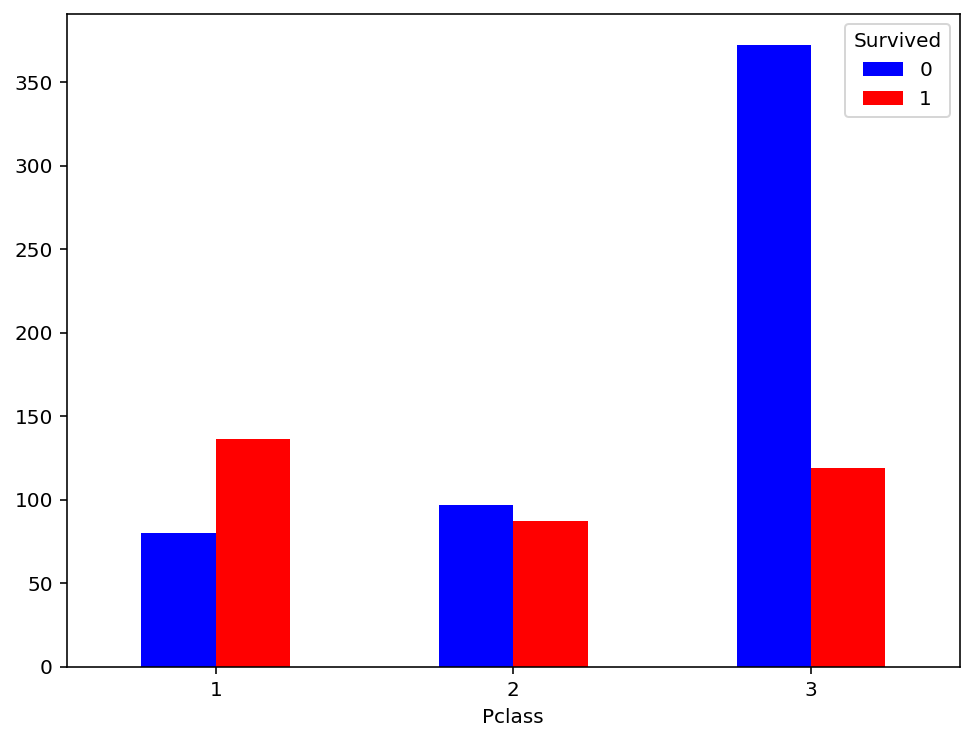

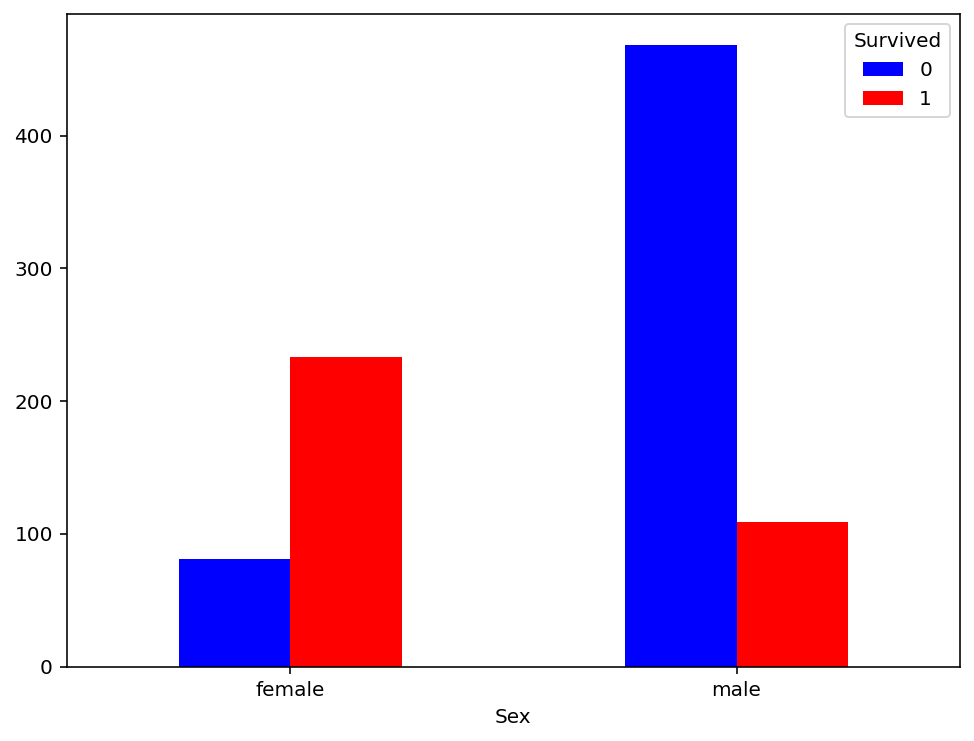

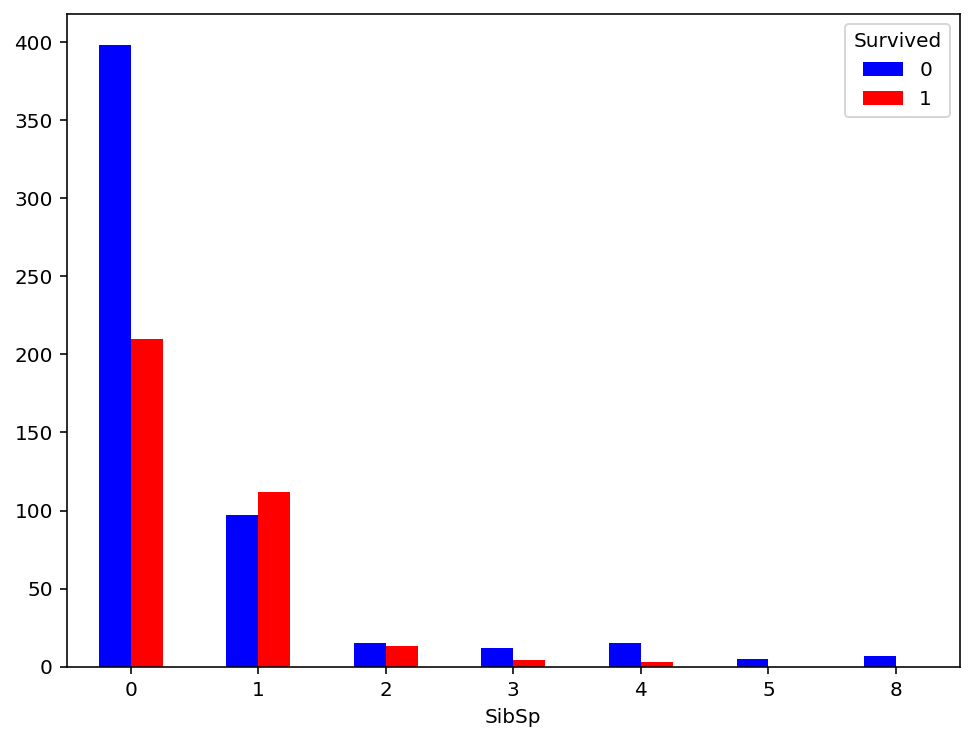

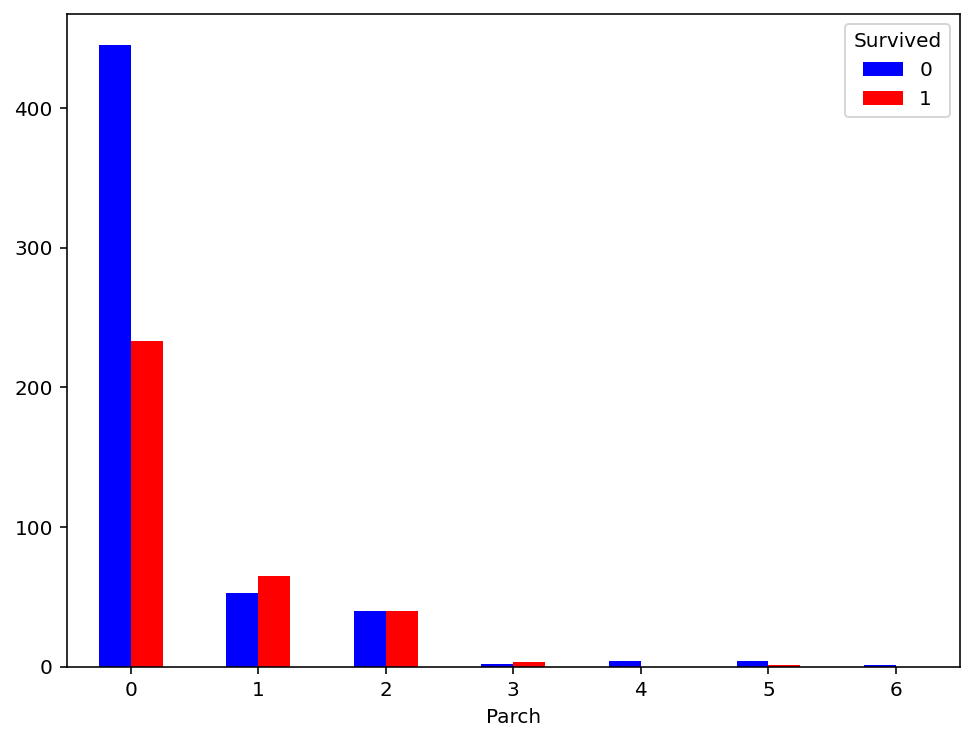

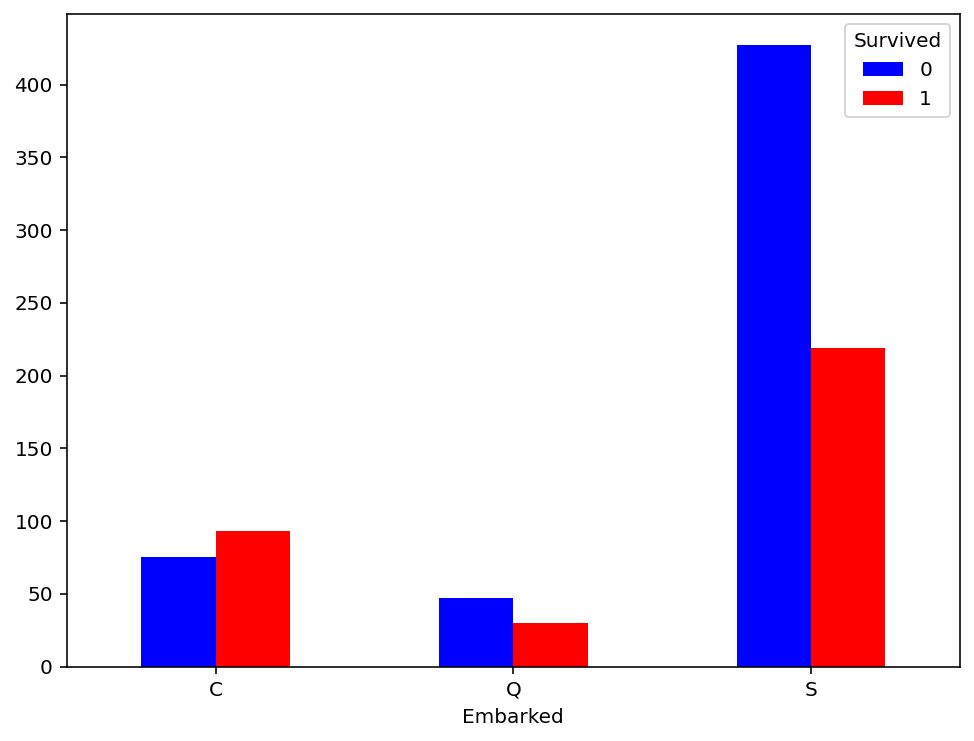

In [22]:
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    crosstabs = pd.crosstab(index=titanic_data[col], columns=titanic_data['Survived'])
    crosstabs.plot.bar(figsize=(8,6), color=['blue', 'red'])
    plt.xticks(rotation=0)
    plt.show()

Generally speaking, if the ratio of the bars is similar across all categories, then the two columns are not correlated.
We shall confirm the finding with the statistical measurements - Chi-squared test.

### Chi-Square Test ###

In [23]:
def chi_square_test(data, target, predictors):
    from scipy.stats import chi2_contingency
    
    selected_predictors = []
    for predictor in predictors:
        crosstabs = pd.crosstab(index=data[predictor], columns=data[target])
        chi_square_result = chi2_contingency(crosstabs)
        
        if chi_square_result[1] < 0.05:
            print(f"Chi-Square result: {chi_square_result[1]} -> {predictor} is correlated with {target}.")
            selected_predictors.append(predictor)
            
        else:
            print(f"Chi-Square result: {chi_square_result[1]} -> {predictor} is not correlated with {target}.")
            
    return selected_predictors

In [24]:
chi_square_test(titanic_data, 'Survived', ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])

Chi-Square result: 4.549251711298793e-23 -> Pclass is correlated with Survived.
Chi-Square result: 1.1973570627755645e-58 -> Sex is correlated with Survived.
Chi-Square result: 1.5585810465902147e-06 -> SibSp is correlated with Survived.
Chi-Square result: 9.703526421039997e-05 -> Parch is correlated with Survived.
Chi-Square result: 2.3008626481449577e-06 -> Embarked is correlated with Survived.


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

**Final features selection: 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare'**

In [25]:
selected_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare']
data_for_ml = titanic_data[selected_columns]

data_for_ml.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,male,1,0,S,7.2500
1,1,female,1,0,C,71.2833
2,3,female,0,0,S,7.9250
3,1,female,1,0,S,53.1000
4,3,male,0,0,S,8.0500


In [26]:
# saving the final data
data_for_ml.to_pickle('data_for_ml.pkl')

## Data Pre-processing ##

In [27]:
# converting binary nominal variables to numeric
data_for_ml['Sex'].replace({'male':1, 'female':0}, inplace=True)

# converting multiclass nominal variables into numeric
ml_data = pd.get_dummies(data_for_ml)

# adding the target
ml_data['Survived'] = titanic_data['Survived']

In [28]:
ml_data

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,1,0,7.2500,0,0,1,0
1,1,0,1,0,71.2833,1,0,0,1
2,3,0,0,0,7.9250,0,0,1,1
3,1,0,1,0,53.1000,0,0,1,1
4,3,1,0,0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,13.0000,0,0,1,0
887,1,0,0,0,30.0000,0,0,1,1
888,3,0,1,2,23.4500,0,0,1,0
889,1,1,0,0,30.0000,1,0,0,1


In [29]:
# defining target variable and predictors
target = 'Survived'
predictors = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = ml_data[predictors].values
y = ml_data[target].values

# splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# standardization
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(X)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 8)
(623,)
(268, 8)
(268,)


## Trying Multiple Classification Algorithms ##

In [32]:
def class_algorithm(model):
    '''
    Function that calculates accuracy of different classification models.
    '''
    
    # printing all model parameters
    from sklearn import set_config
    set_config(print_changed_only=False)
    print(model)
    
    # fitting the model on training data
    model_fit = model.fit(X_train, y_train)
    prediction = model_fit.predict(X_test)
    
    # calculating testing data accuracy
    from sklearn import metrics
    classification_report = metrics.classification_report(y_test, prediction)
    confusion_matrix = metrics.confusion_matrix(y_test, prediction, labels=[1,0])
    f1_score = metrics.f1_score(y_test, prediction, average='weighted')
    print("CLASSIFICATION REPORT:\n")
    print(classification_report, "\n")
    print("CONFUSION MATRIX:\n")
    print(confusion_matrix, "\n")
    print(f"Testing data accuracy: {round(f1_score,2)}")
    
    # cross validation
    from sklearn.model_selection import cross_val_score
    accuracy_vals = cross_val_score(model, X, y, cv=10, scoring='f1_weighted')
    print(f"Final average accuracy score of the model: {round(accuracy_vals.mean(),2)}\n")
    
    # plotting feature importances
    try:
        import matplotlib.pyplot as plt
        feature_importances = pd.Series(model.feature_importances_, index=predictors)
        feature_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
        print("FEATURE IMPORTANCES:\n")
        plt.show()
    except:
        pass

### Logistic Regression ###

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=5, solver='newton-cg')

class_algorithm(lr)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       157
           1       0.73      0.73      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268
 

CONFUSION MATRIX:

[[ 81  30]
 [ 30 127]] 

Testing data accuracy: 0.78


Final average accuracy score of the model: 0.78



### Decision Tree Classifier ###

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')
CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.83      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268
 

CONFUSION MATRIX:

[[ 76  35]
 [ 16 141]] 

Testing data accuracy: 0.81
Final average accuracy score of the model: 0.8

FEATURE IMPORTANCES:



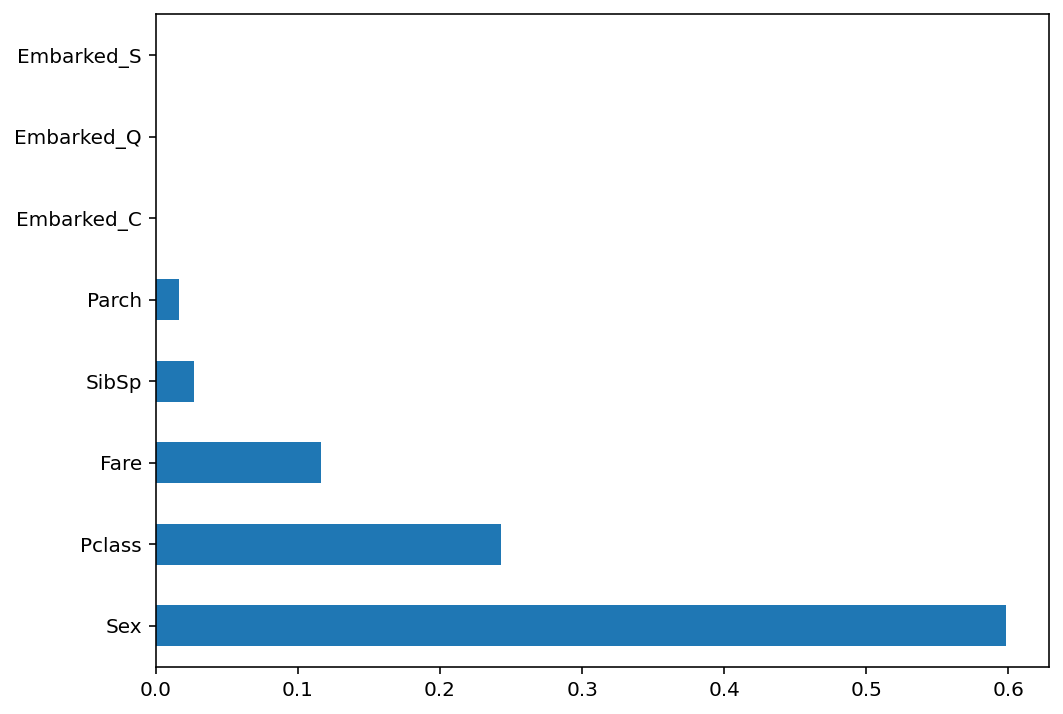

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy')

class_algorithm(dt)

### Random Forest Classifier ###

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.81      0.65      0.72       111

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268
 

CONFUSION MATRIX:

[[ 72  39]
 [ 17 140]] 

Testing data accuracy: 0.79


Final average accuracy score of the model: 0.8

FEATURE IMPORTANCES:



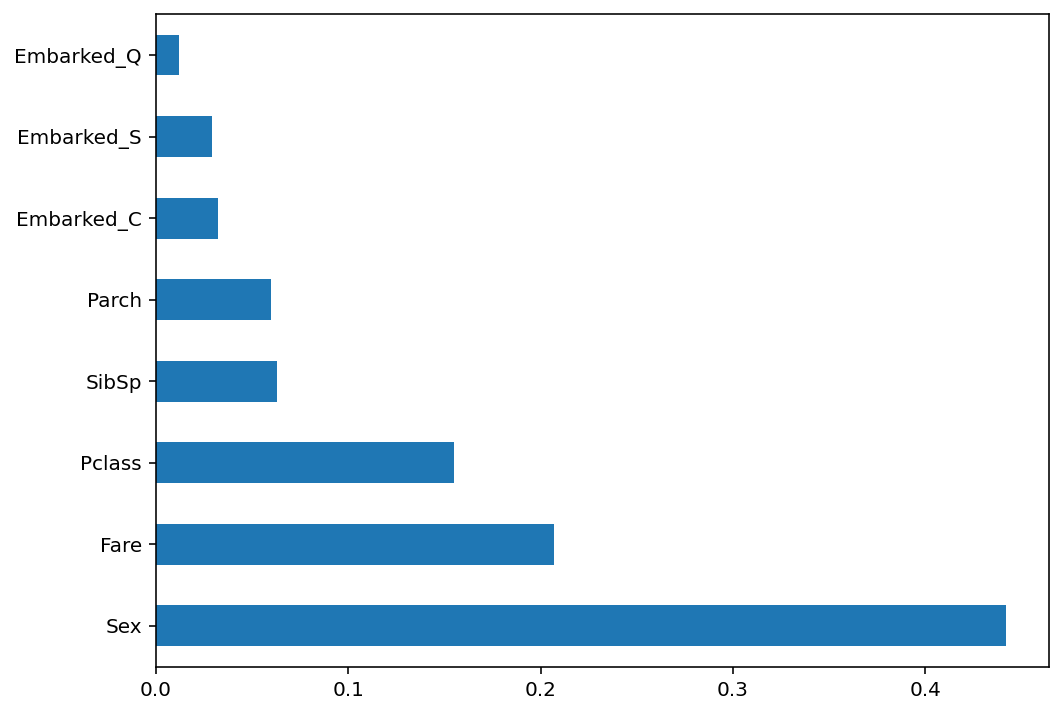

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=4, n_estimators=200, criterion='entropy')

class_algorithm(rf)

### AdaBoost Classifier ###

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       157
           1       0.76      0.67      0.71       111

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268
 

CONFUSION MATRIX:

[[ 74  37]
 [ 24 133]] 

Testing data accuracy: 0.77


Final average accuracy score of the model: 0.8

FEATURE IMPORTANCES:



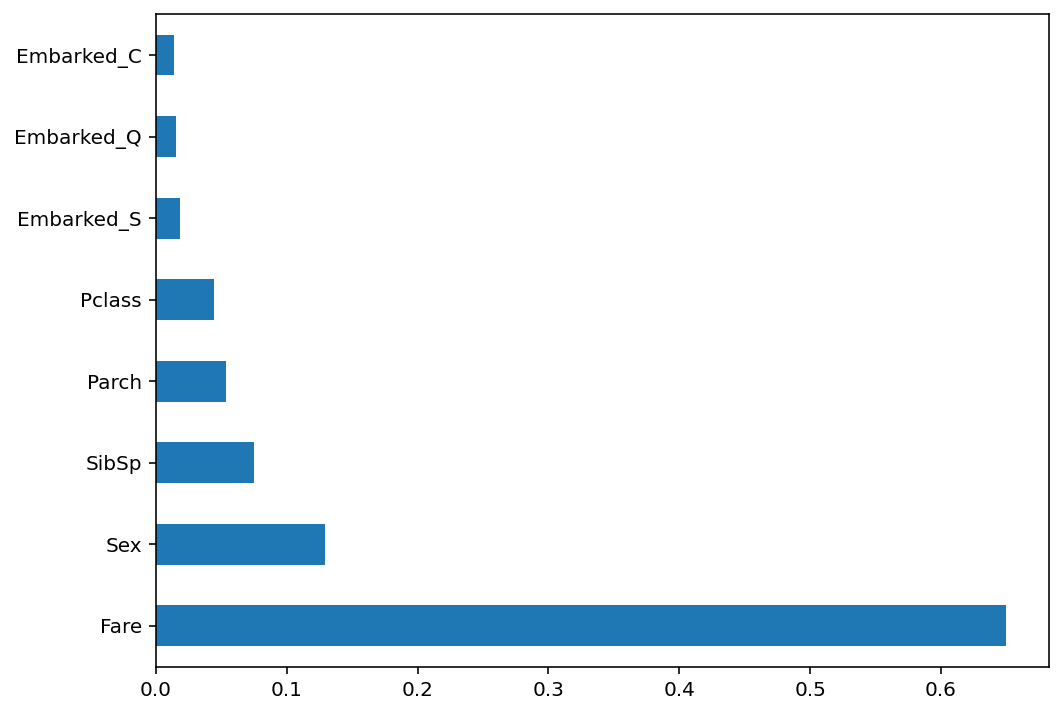

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(base_estimator=dt, n_estimators=100, learning_rate=0.1)

class_algorithm(ab)

### XGBoost Classifier ###

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)


CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       157
           1       0.79      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268
 

CONFUSION MATRIX:

[[ 75  36]
 [ 20 137]] 

Testing data accuracy: 0.79


Final average accuracy score of the model: 0.8

FEATURE IMPORTANCES:



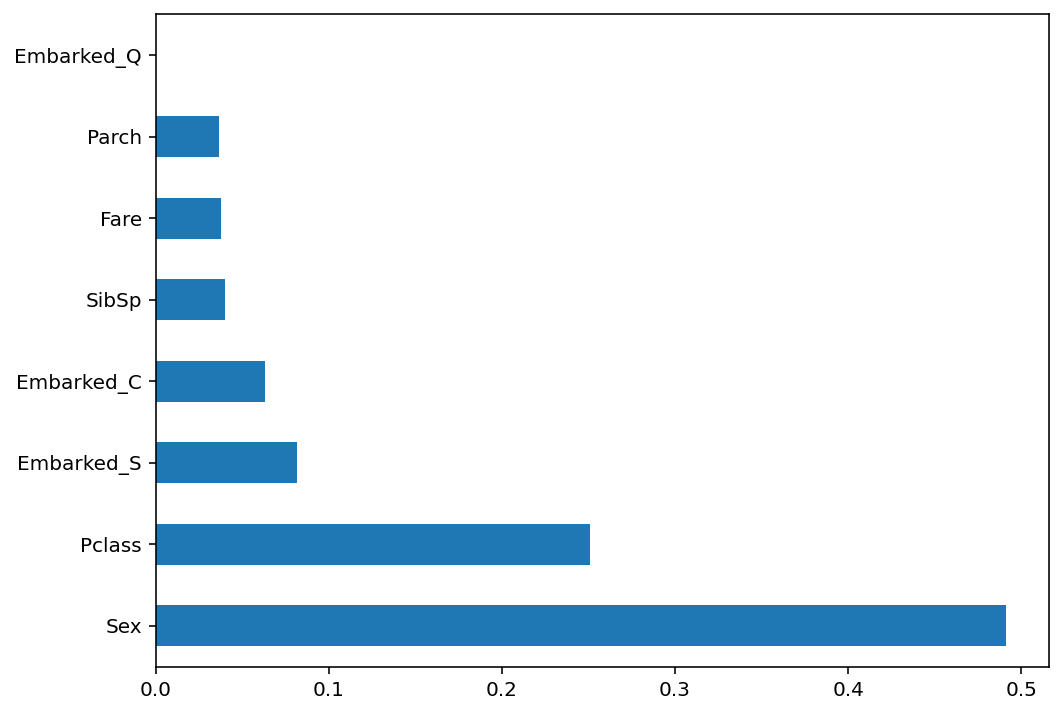

In [37]:
from xgboost import XGBClassifier
xg = XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')

class_algorithm(xg)

### KNN Classifier ###

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

class_algorithm(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       157
           1       0.76      0.53      0.62       111

    accuracy                           0.74       268
   macro avg       0.74      0.71      0.71       268
weighted avg       0.74      0.74      0.72       268
 

CONFUSION MATRIX:

[[ 59  52]
 [ 19 138]] 

Testing data accuracy: 0.72
Final average accuracy score of the model: 0.79



### SVM Classifier ###

In [39]:
from sklearn import svm
sc = svm.SVC(C=10, gamma=0.01)

class_algorithm(sc)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       157
           1       0.75      0.74      0.75       111

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268
 

CONFUSION MATRIX:

[[ 82  29]
 [ 27 130]] 

Testing data accuracy: 0.79


Final average accuracy score of the model: 0.78



### Gaussian Naive Bayes Classifier ###

In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

class_algorithm(nb)

GaussianNB(priors=None, var_smoothing=1e-09)
CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       157
           1       0.68      0.80      0.74       111

    accuracy                           0.76       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.76      0.77       268
 

CONFUSION MATRIX:

[[ 89  22]
 [ 41 116]] 

Testing data accuracy: 0.77
Final average accuracy score of the model: 0.78



## Selecting the Best Model ##

After trying all of the models above, we can see that they perform similarly. The accuracy scores range between 0.78 and 0.8., so we can choose any of these to be our final model.

My choice is **DecisionTreeClassifier**, for its speed on binary classification problems.

## Deploying the Model ##

In [41]:
# defining target variable
target = 'Survived'

# choosing only the top five variables according to feature performance
predictors = ['Sex', 'Pclass', 'Fare', 'SibSp', 'Parch']

X = ml_data[predictors].values
y = ml_data[target].values

# standardization of predictors
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(X)

In [42]:
# retraning the DecisionTreeClassifer model using 100% data available
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
final_model = dt_model.fit(X, y)

In [43]:
# running 10-fold cross validation of the final model
from sklearn.model_selection import cross_val_score
accuracy_vals = cross_val_score(final_model, X, y, cv=10, scoring='f1_weighted')
print(f"Final average accuracy of the model: {round(accuracy_vals.mean(),2)}")

Final average accuracy of the model: 0.8


In [108]:
# creating the function to deploy the model
def predict_function(input_data):
    # number of input data rows (which we try to predict)
    num_data = input_data.shape[0]
    
    # loading pickled cleaned data
    data_for_ml = pd.read_pickle('data_for_ml.pkl')
    
    # appending cleaned data to input data
    input_data = input_data.append(data_for_ml)
    
    # preprocessing data
    input_data['Sex'].replace({'female':0, 'male':1}, inplace=True)
    input_data = pd.get_dummies(input_data)
    
    # predictors
    predictors = ['Sex', 'Pclass', 'Fare', 'SibSp', 'Parch']
    X = input_data[predictors].values[:num_data]
    
    # standardize predictors
    from sklearn.preprocessing import MinMaxScaler
    mm_scaler = MinMaxScaler()
    X = mm_scaler.fit_transform(X)
    
    # prediction
    prediction = final_model.predict(X)
    prediction_result = pd.DataFrame(data=prediction, columns=['Prediction'])
    return (prediction_result)

In [109]:
# new input to get prediction to
new_input=pd.DataFrame(
data = [
        ['male', 3, 7, 1, 0],
        ['female', 1, 71, 1, 0],
        ['male', 1, 30, 0, 0],
        ['male', 3, 8, 0, 0]
    ],
columns=['Sex', 'Pclass', 'Fare', 'SibSp', 'Parch']
)

print(new_input)

      Sex  Pclass  Fare  SibSp  Parch
0    male       3     7      1      0
1  female       1    71      1      0
2    male       1    30      0      0
3    male       3     8      0      0


In [122]:
# calling prediction function
predict_function(new_input)

,Prediction
0,0
1,1
2,0
3,0
